## Import libraries

In [1]:
import numpy as np
import pandas as pd
import re
import time
import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head() # will display the first five rows of the dataset as shown below

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum() # here i will make count for null values and every columns

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Cleaning and Creating Dummy Variables

In [6]:
# The best way to fill missing values might be using the median instead of mean.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [7]:
# Count the number of unique values in category column 
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
# Check the record  of unreasonable value which is 1.9
i = df[df['Category'] == '1.9'].index
df.loc[i]
# Drop this bad column
df = df.drop(i)

In [9]:
# Removing NaN values
df = df[pd.notnull(df['Last Updated'])]
df = df[pd.notnull(df['Content Rating'])]

In [10]:
# App values encoding
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])
# This encoder converts the values into numeric values
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6962,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up
1,2632,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up
2,8656,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up
3,7827,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up
4,7022,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up


In [11]:
# Category features encoding
df['Category'] = df['Category'].map({'ART_AND_DESIGN':0,'AUTO_AND_VEHICLES':1,'BEAUTY':2,'BOOKS_AND_REFERENCE':3,'BUSINESS':4,'COMICS':5,
                                     'COMMUNICATION':6,'DATING':7,'EDUCATION':8,'ENTERTAINMENT':9,'EVENTS':10,'EVENTS':11,'FINANCE':12,
                                    'FOOD_AND_DRINK':13,'HEALTH_AND_FITNESS':14,'HOUSE_AND_HOME':15,'LIBRARIES_AND_DEMO':16,'LIFESTYLE':17,
                                    'GAME':18,'FAMILY':19,'MEDICAL':20,'SOCIAL':21,'SHOPPING':22,'PHOTOGRAPHY':23,'SPORTS':24,'TRAVEL_AND_LOCAL':25,
                                    'TOOLS':26,'PERSONALIZATION':27,'PRODUCTIVITY':28,'PARENTING':29,'WEATHER':30,'VIDEO_PLAYERS':31,
                                     'NEWS_AND_MAGAZINES':32,'MAPS_AND_NAVIGATION':33})

In [12]:
# Genres features encoding
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [13]:
# Encode Content Rating features
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [14]:
# Price cealning
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [15]:
# Installs cealning
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [16]:
# Type encoding
df['Type'] = pd.get_dummies(df['Type'])

In [17]:
# Last Updated encoding
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [18]:
# Convert kbytes to Mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [19]:
# Size cleaning
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)
df1 = df

## Feature selection

In [20]:
# Split data into training and testing sets
features = ['App','Category','Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
X = df[features]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

## Training & Testing of Model

### Question (1): How we can predict app rating?

In [21]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(X_train, y_train)
predict = model.predict(X_test)
pred = model.predict([[9486,17,398307,19.000,10000000,1,0,1,67,1.532466e+09,0.000000e+00]])
print(pred)
svr_ac=r2_score(y_test, predict)
print('knn regression_accuracy:',str(np.round(svr_ac*100, 2)) ,'%')

[4.35333333]
knn regression_accuracy: 92.23 %


### Question (2): How we can predict price?

In [22]:
# Split data into training and testing sets
features1 = ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres']
X1 = df[features]
del X1['Reviews']
del X1['Installs']
del X1['Price']
del X1['Last Updated']
del X1['Current Ver']
y1 = df['Price']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 10)
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train1.astype(str),y_train1.astype(str))
rdf_pred = rdf_c.predict(X_test1)
pred = rdf_c.predict([[6858,20,41.000,0,1,71]])
print("The predict price is: " , pred)
rdf_ac=accuracy_score(rdf_pred.astype(str),y_test1.astype(str))
print('RandomForest_accuracy:',str(np.round(rdf_ac*100, 2)) ,'%')

The predict price is:  ['29.99']
RandomForest_accuracy: 95.02 %


### Question (3): Does App size affect downloads?

Text(0.5, 1.0, 'The relationship between App Size and Download Frequency')

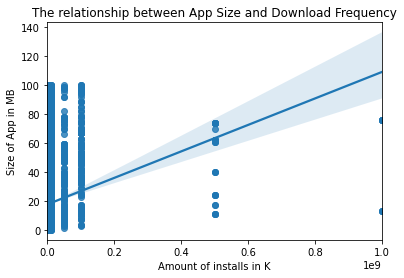

In [23]:
df['Installs'] = df[df.columns[5]].replace('[\+,]', '', regex=True).astype(float)
sns.regplot(x='Installs', y='Size', fit_reg=True, data=df)
plt.xlabel('Amount of installs in K')
plt.ylabel('Size of App in MB')
plt.title('The relationship between App Size and Download Frequency')

### Question (4): Which Category has a highest Reviews?

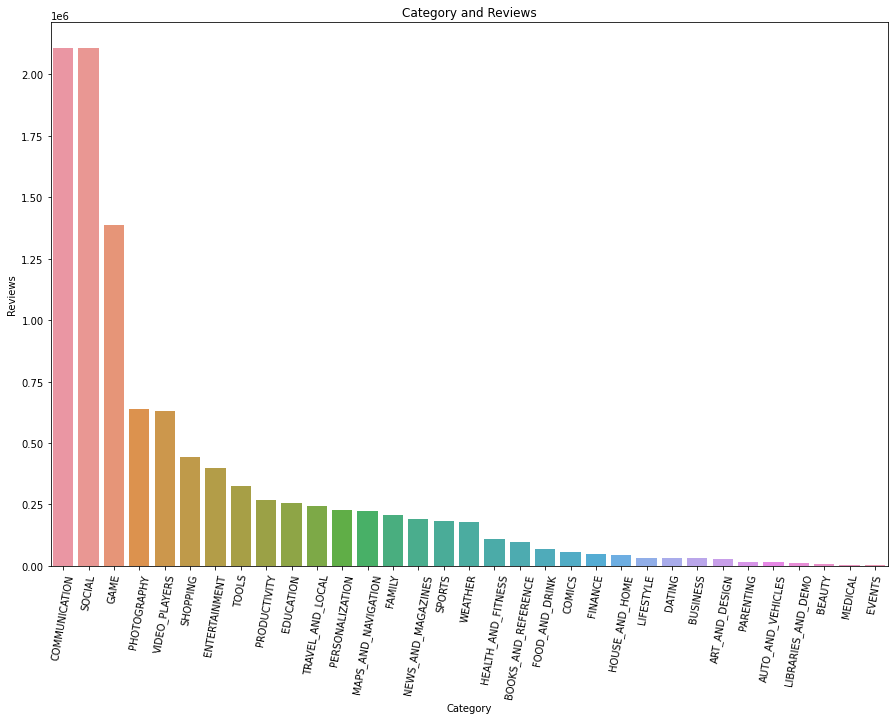

In [24]:
data = pd.read_csv("googleplaystore.csv")
# Check the record  of unreasonable value which is 1.9
i = data[data['Category'] == '1.9'].index
data.loc[i]
# Drop this bad column
data = data.drop(i)
data['Reviews'] = data.Reviews.replace("0.0",0)
data['Reviews'] = data.Reviews.replace("3.0M",3000000.0)
data['Reviews'] = data['Reviews'].astype(float)
category_list = list(data['Category'].unique())
category_review = []
for i in category_list:
    x = data[data['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

### Question (5): which features are effects on the rating for app?

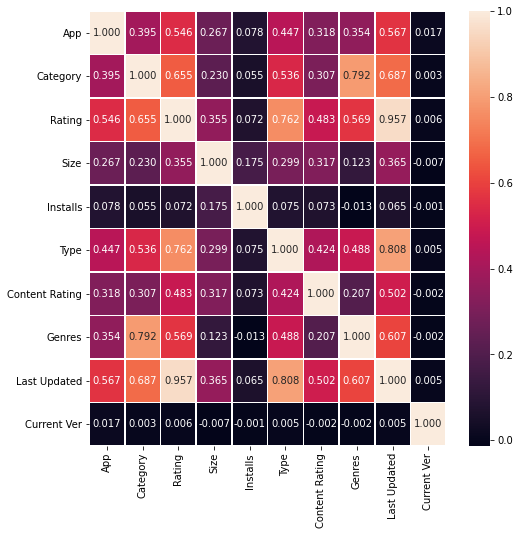

In [25]:
df.corr()
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.3f',ax=ax)
plt.show()

### Question (6): What is the most common factor between the highly rating apps?

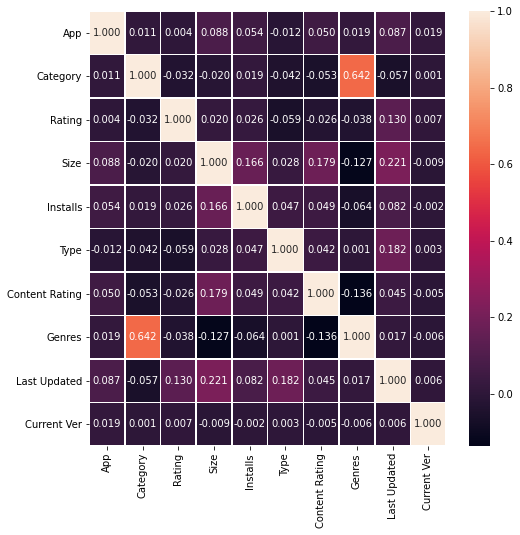

In [26]:
# Check the record  of unwanted value which is less than or equal 3.4
i = df[df['Rating'] <= 3.4].index
df.loc[i]
# Drop this data
df = df.drop(i)
df.corr()
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.3f',ax=ax)
plt.show()

### Question (7): What is the most common factor between the lowessly rating apps?

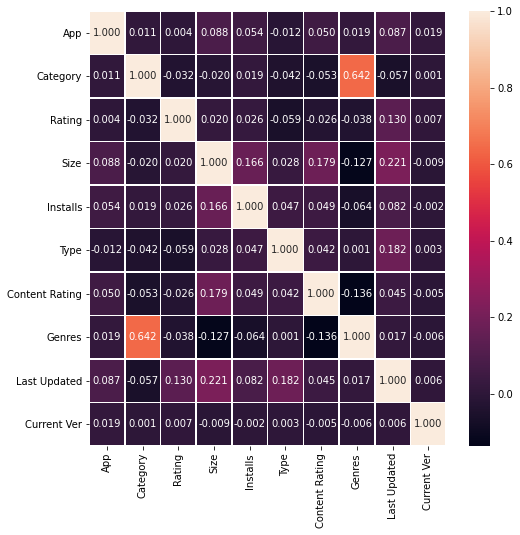

In [27]:
# Check the record  of unwanted values which is greater than or equal 1.4
i = df1[df1['Rating'] >= 1.4].index
df1.loc[i]
# Drop this data
df1 = df1.drop(i)
df1.corr()
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.3f',ax=ax)
plt.show()